In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets 
digits = datasets.load_digits()

In [2]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [3]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [4]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

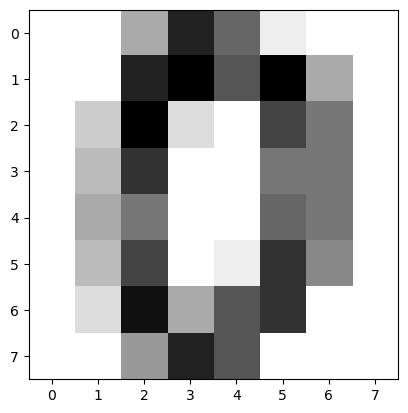

In [5]:
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

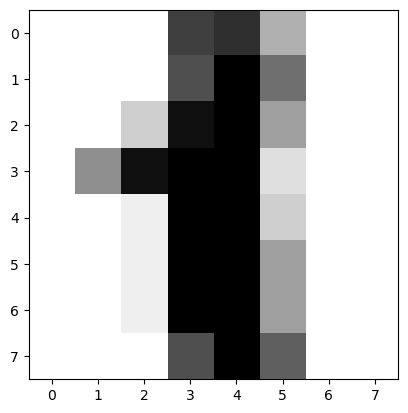

In [6]:
plt.imshow(digits.images[1], cmap=plt.cm.gray_r, interpolation='nearest')

### Using Support Vector Machine (SVM)

In [7]:
from sklearn import svm
from sklearn.model_selection import train_test_split
svc = svm.SVC(gamma=0.001, C=100.)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,random_state=5)

In [9]:
x_train.shape

(1347, 64)

In [10]:
y_train.shape

(1347,)

In [11]:
x_test.shape

(450, 64)

In [12]:
y_test.shape

(450,)

In [13]:
svc.fit(x_train,y_train)

SVC(C=100.0, gamma=0.001)

In [14]:
y_pred=svc.predict(x_test)

In [15]:
svc.score(x_test,y_test)

0.9888888888888889

In [16]:
svc.score(x_train,y_train)

1.0

In [17]:
from sklearn import metrics
score=metrics.accuracy_score(y_test,y_pred)

In [18]:
from sklearn.model_selection import cross_val_score
svc = svm.SVC(gamma=0.001, C=100.)
cross_val_score(svc,digits.data,digits.target,cv=10,scoring='accuracy').mean()

0.9810738671632526

Text(0.5, 1.0, 'Accuracy Score: 0.9888888888888889')

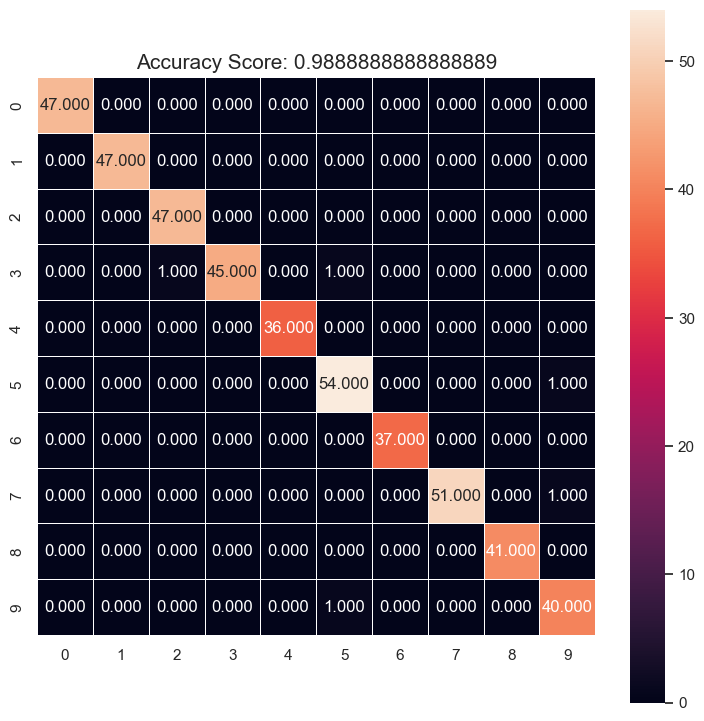

In [19]:
import seaborn as sn
plt.figure(figsize=(9,9))
plt.ylabel="Actual label"
plt.xlabel="Predicted label"
confusion=metrics.confusion_matrix(y_test,y_pred)
sn.set(font_scale=1)
sn.heatmap(confusion, annot=True,fmt=".3f", linewidth=.5, square=True)
title='Accuracy Score: {0}'.format(score)
plt.title(title,size=15)

## Using Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lreg=LogisticRegression()

In [23]:
lreg.max_iter=100
lreg.solver='liblinear'

In [24]:
lreg.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [25]:
y_pred=lreg.predict(x_test)

In [26]:
score=lreg.score(x_test,y_test)

Text(0.5, 1.0, 'Accuracy Score: 0.96')

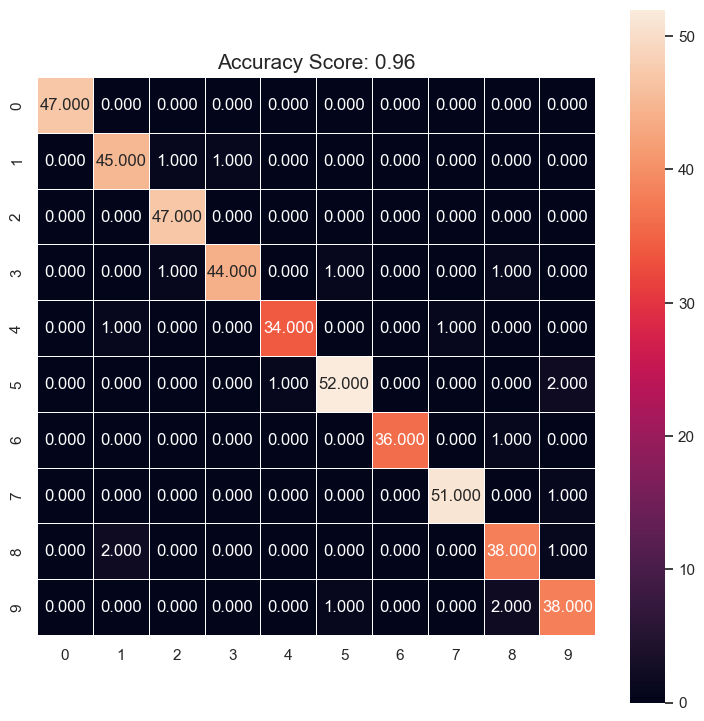

In [28]:
import seaborn as sn
plt.figure(figsize=(9,9))
plt.ylabel="Actual label"
plt.xlabel="Predicted label"
confusion=metrics.confusion_matrix(y_test,y_pred)
sn.set(font_scale=1)
sn.heatmap(confusion, annot=True,fmt=".3f", linewidth=.5, square=True)
title='Accuracy Score: {0}'.format(score)
plt.title(title,size=15)

### Misclassified images with labels

In [29]:
i=0
mi=[]
for predict,actual in zip(y_pred,y_test):
    if predict!=actual:
        mi.append(i)
    i+=1   

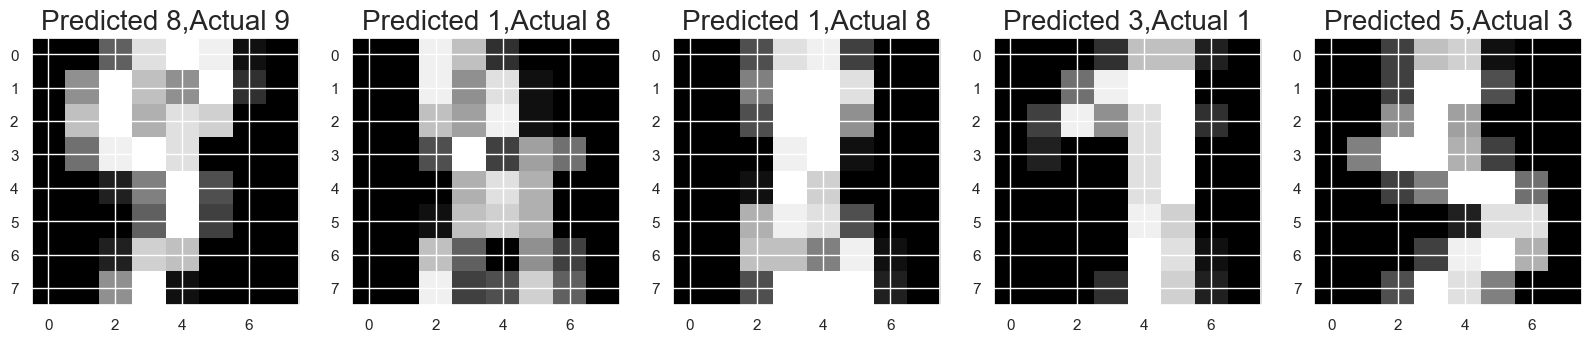

In [30]:
plt.figure(figsize=(20,4))
for plotIndex,wrong in enumerate(mi[10:15]):
    plt.subplot(1,5,plotIndex+1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)), cmap=plt.cm.gray)
    plt.title('Predicted {},Actual {}'.format(y_pred[wrong],y_test[wrong]), fontsize=20)